# 01. Importing Libraries / Path / Data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# create path
path = r'C:\Users\TypicalPancake\DA Instacart Basket Analysis 12-2024'

In [8]:
Instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# 02. Creating Bar Chart, Histogram, Scatterplot, & Line Chart

In [27]:
Instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


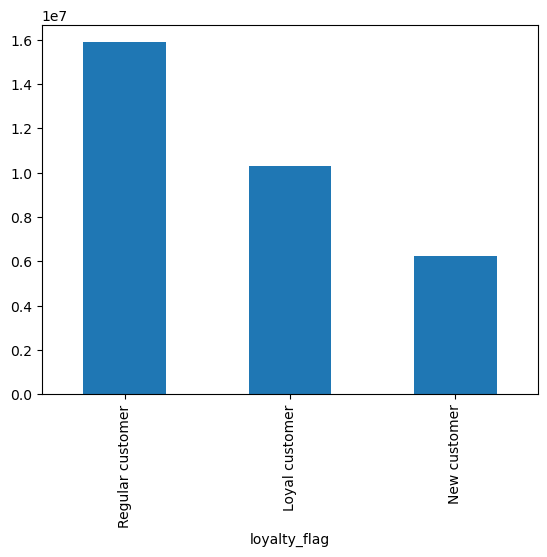

In [25]:
# creating Bar Chart
bar = Instacart['loyalty_flag'].value_counts().plot.bar()

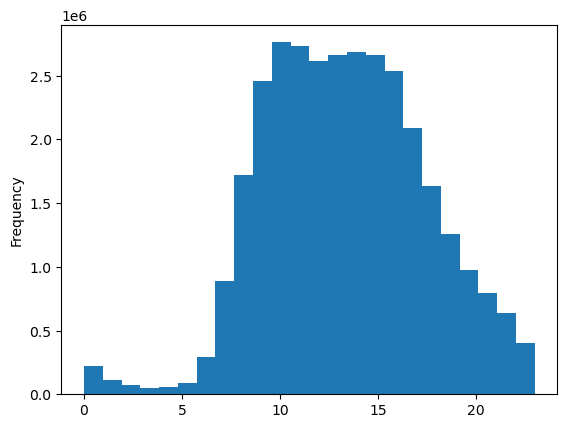

In [23]:
# creating a histogram
hist = Instacart['order_hour_of_day'].plot.hist(bins = 24)

Histogram shows busiest times of day are from 9am - 3pm

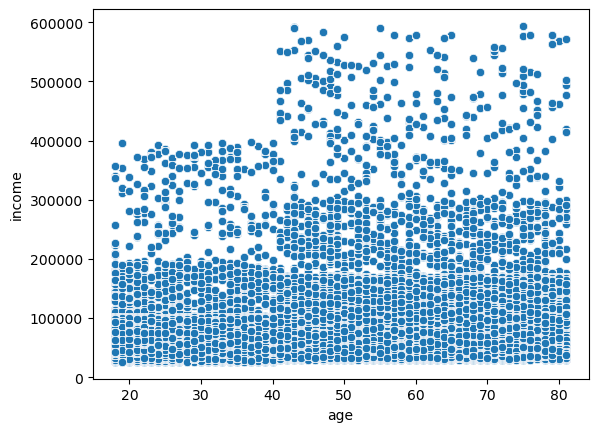

In [33]:
# creating a scatterplot
scatter = sns.scatterplot(x='age', y='income', data=Instacart)

There is a huge wage gap once past the 40 year old mark. 

# 03. Create A Line Chart For Prices On The Hour of The Day

In [42]:
# creating sample of dataframe
test_instacart = Instacart.sample(n=100000, random_state=1)

In [50]:
# calculating 'hour_of_the_day' mean
hourly_spending = test_instacart.groupby('order_hour_of_day')['prices'].mean().reset_index()

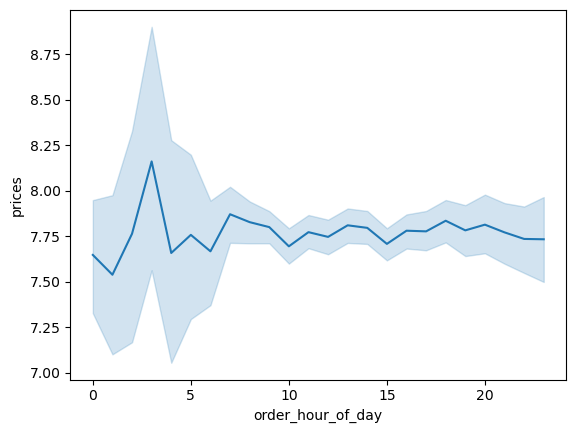

In [52]:
# creating line chart
pr_hour_day = sns.lineplot(data = test_instacart, x = 'order_hour_of_day', y = 'prices')

# 04. Create A Line Chart For An Analysis of Customer Demographics

In [55]:
test_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income
13217062,1031208,83731,74,1,9,2.0,32465,5,1,both,...,Frequent customer,Jane,Salazar,Female,Rhode Island,76,8/1/2018,1,married,141199
2688660,2416341,17208,44,0,15,9.0,48679,9,1,both,...,Frequent customer,Norma,Lin,Female,Montana,41,4/30/2019,3,married,146471
29886654,1728217,190070,8,6,10,3.0,6343,2,1,both,...,Frequent customer,Douglas,Andrews,Male,Texas,68,2/15/2020,1,married,153779
22983357,1167246,146062,37,6,17,6.0,19057,12,1,both,...,Frequent customer,Harold,Jimenez,Male,West Virginia,35,11/4/2018,1,married,74412
16892029,738769,107024,28,1,6,4.0,45208,16,1,both,...,Frequent customer,George,Duke,Male,New Mexico,19,12/10/2017,0,single,67487


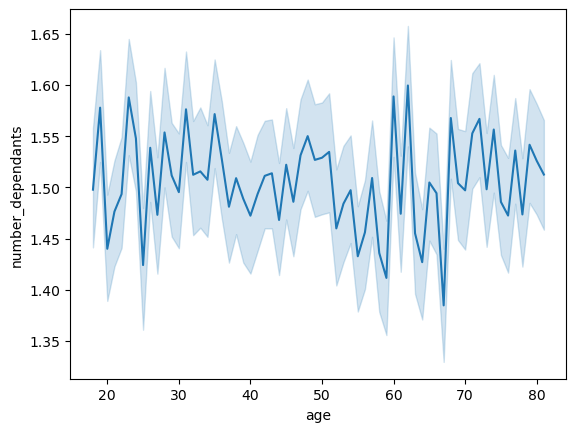

In [57]:
age_num_dep = sns.lineplot(data = test_instacart, x = 'age', y = 'number_dependants')

There is no evidence indicating a strong relationship between age and the number of depends in a household.

# 05. Export Visualizations as PNG

In [66]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_graph_loyalty_flag'))

In [68]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day'))

In [70]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income'))

In [72]:
pr_hour_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day'))

In [74]:
age_num_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_num_dep'))